In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = r"C:\Users\longv\Prediction-House-Price\Data\train.csv"
test_path = r"C:\Users\longv\Prediction-House-Price\Data\test.csv"

In [3]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\longv\\Prediction-House-Price\\Data\\train.csv'

In [10]:
#cùng xem qua dữ liệu một cách tổng quát
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Ta chỉ sử dụng những trường có kiểu dữ liệu là numerical để train và test

# liệt kê các kiểu dữ liệu có trong df
list(set(df_train.dtypes.to_list()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [13]:
# chỉ chọn numerical field nên là float64 và int64

#chọn dữ liệu kiểu số
df_num = df_train.select_dtypes(include = ['float64', 'int64'])

In [2]:
df_test_num = df_test.select_dtypes(include = ['float64', 'int64'])

NameError: name 'df_test' is not defined

In [15]:
df_num.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

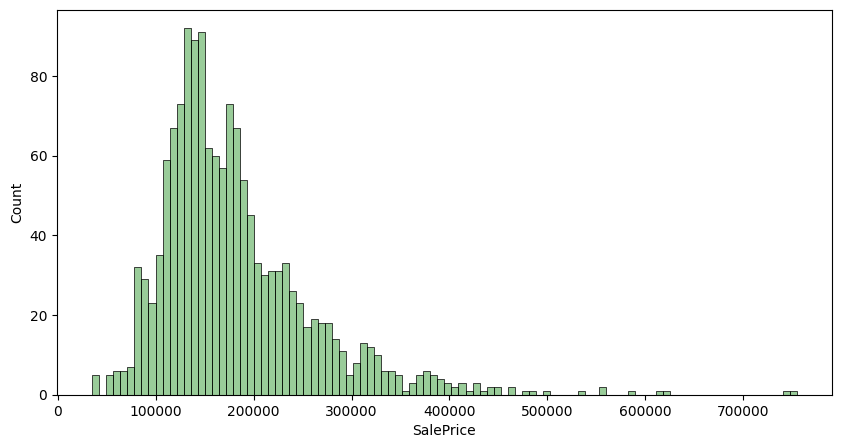

In [26]:
# xem qua phân bố dữ liệu của giá nhà
print(df_num['SalePrice'].describe())
plt.figure(figsize = (10,5))
sns.histplot(df_num['SalePrice'], bins=100, color='g', alpha=0.4)



In [27]:
# => rút ra vài điều về phân bố giá


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

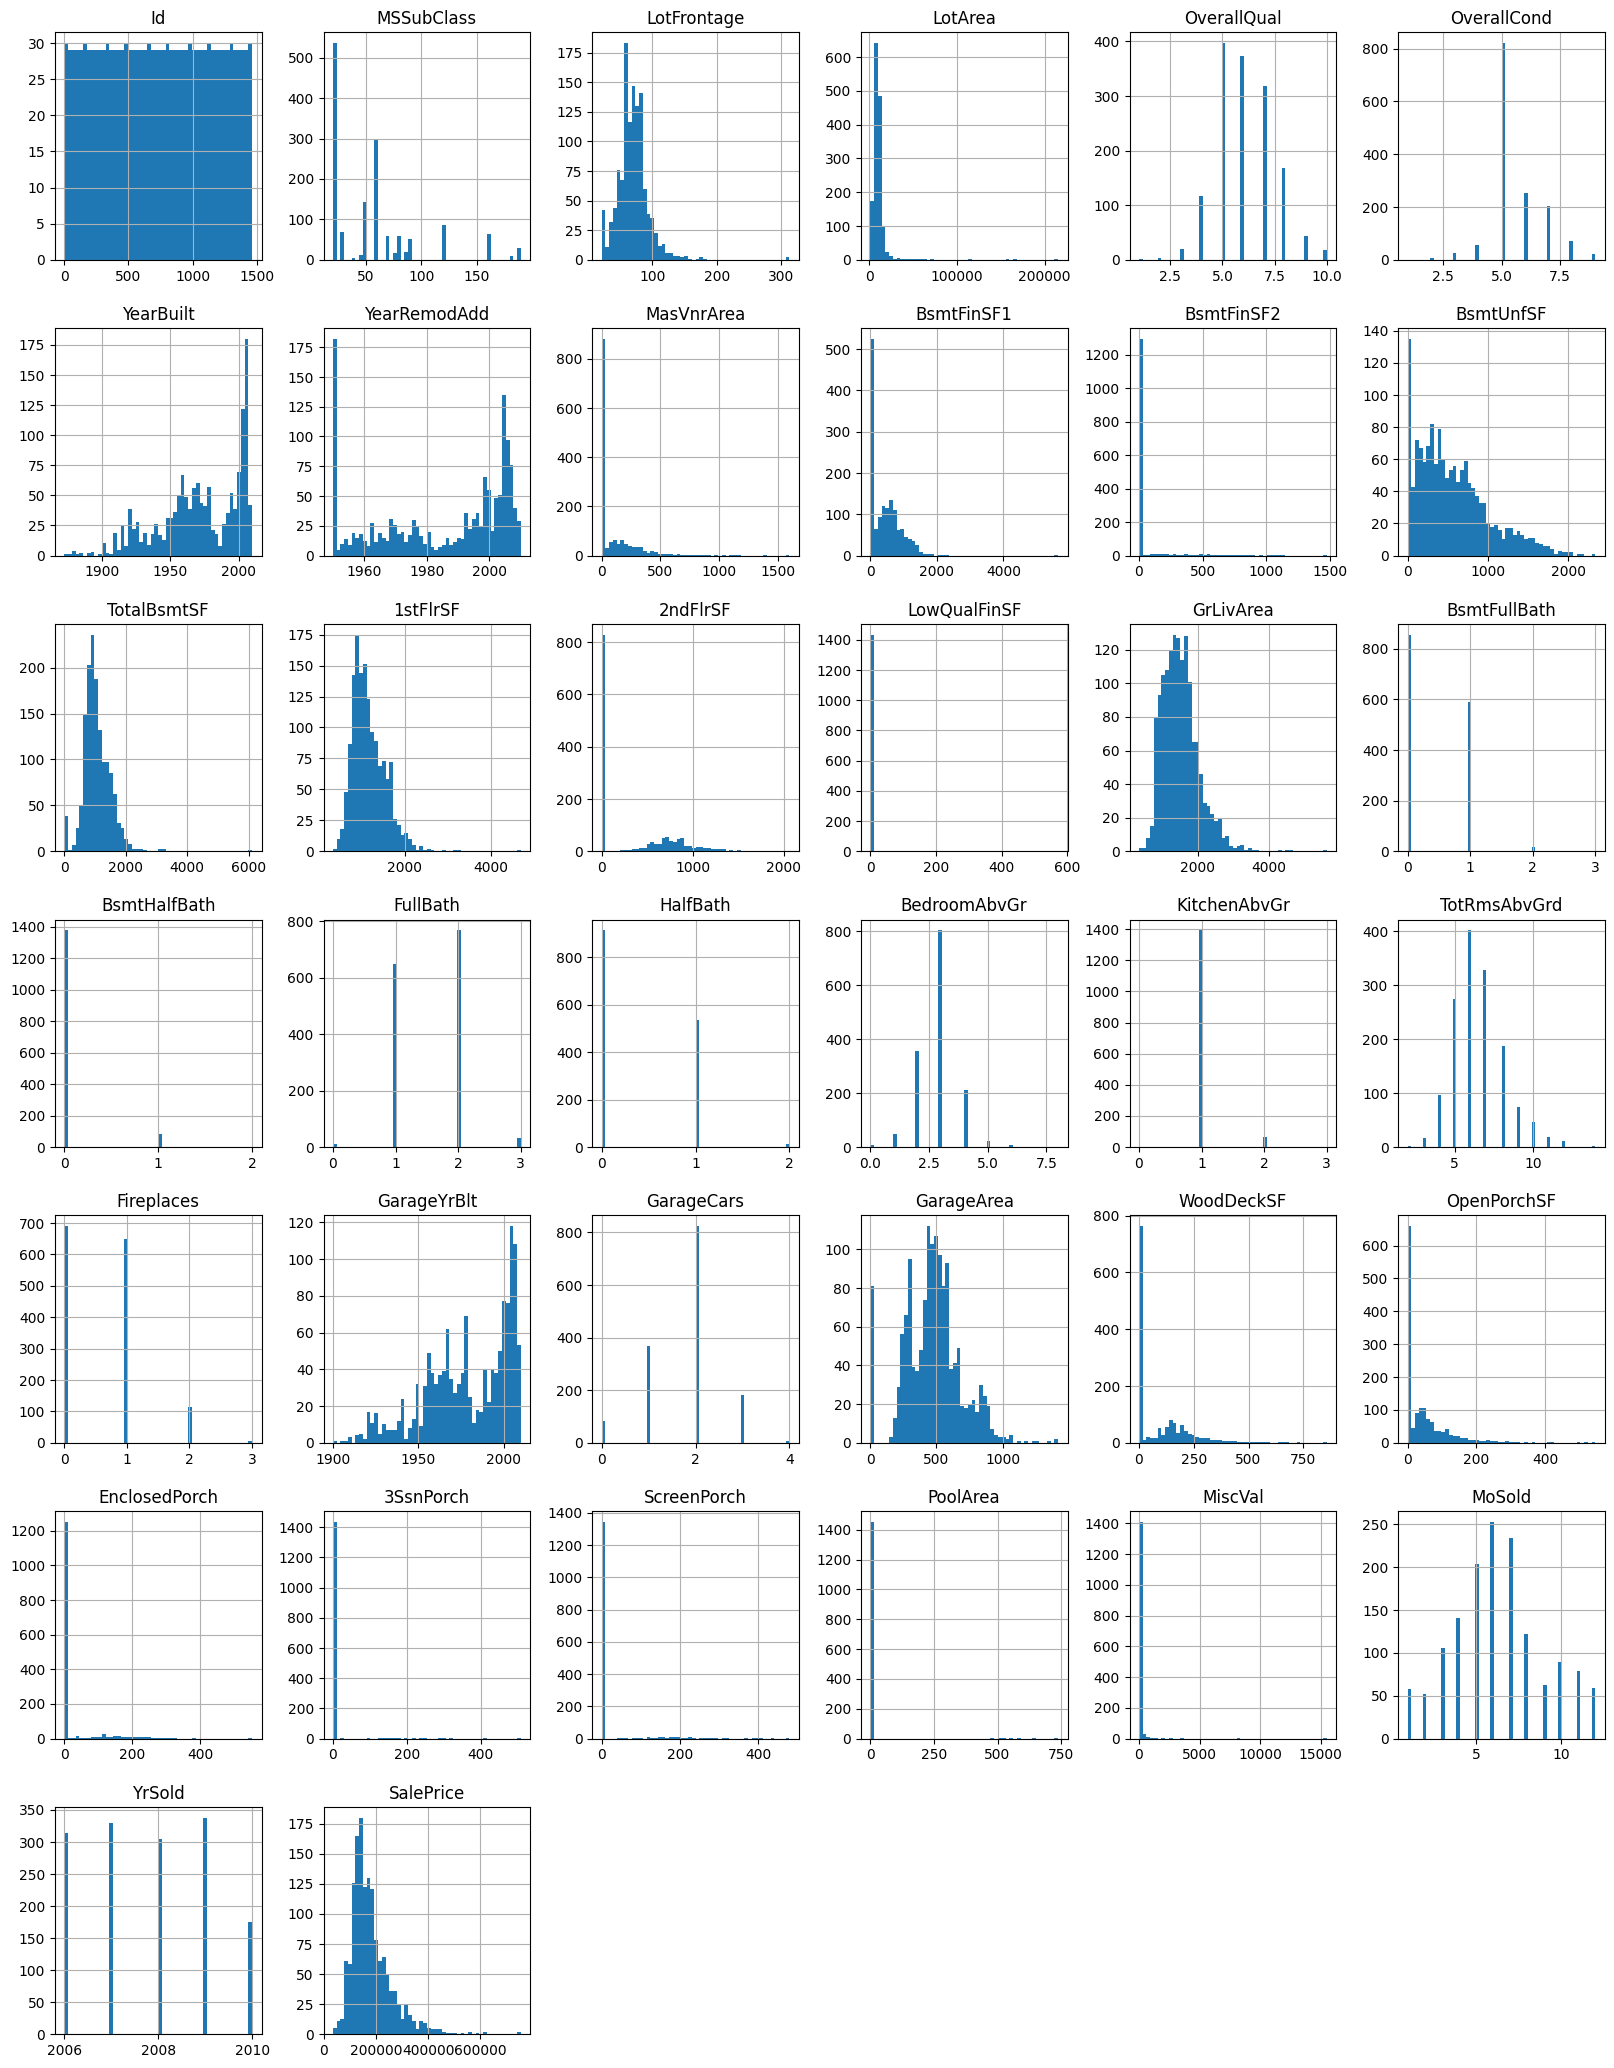

In [28]:
# xem phân bố dữ liệu của các features khác
df_num.hist(figsize = (20,26), bins = 50, xlabelsize = 10, ylabelsize = 10)

In [29]:
#save csv file
df_num.to_csv( r"C:\Users\longv\Prediction-House-Price\Data\dataNumerical.csv", index=False)